In [12]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.ticker import FuncFormatter

In [13]:
# Import common styles
%run ../common_styles.ipynb

In [14]:
# Setting font
font_dirs = ['Cabin/']
font_files = font_manager.findSystemFonts(fontpaths = font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = FONT_STYLE

In [15]:
# Import cleaned data
%run first_graph_data_cleaning.ipynb

In [16]:
# Useful functions
def millions_formatter(x, pos):
    return f'{x / 1000000:.0f}'

/var/folders/jm/66dcr8v53376nb99r_h2hskr0000gn/T/ipykernel_30856/661240618.py:15: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(wspace = 0.75)


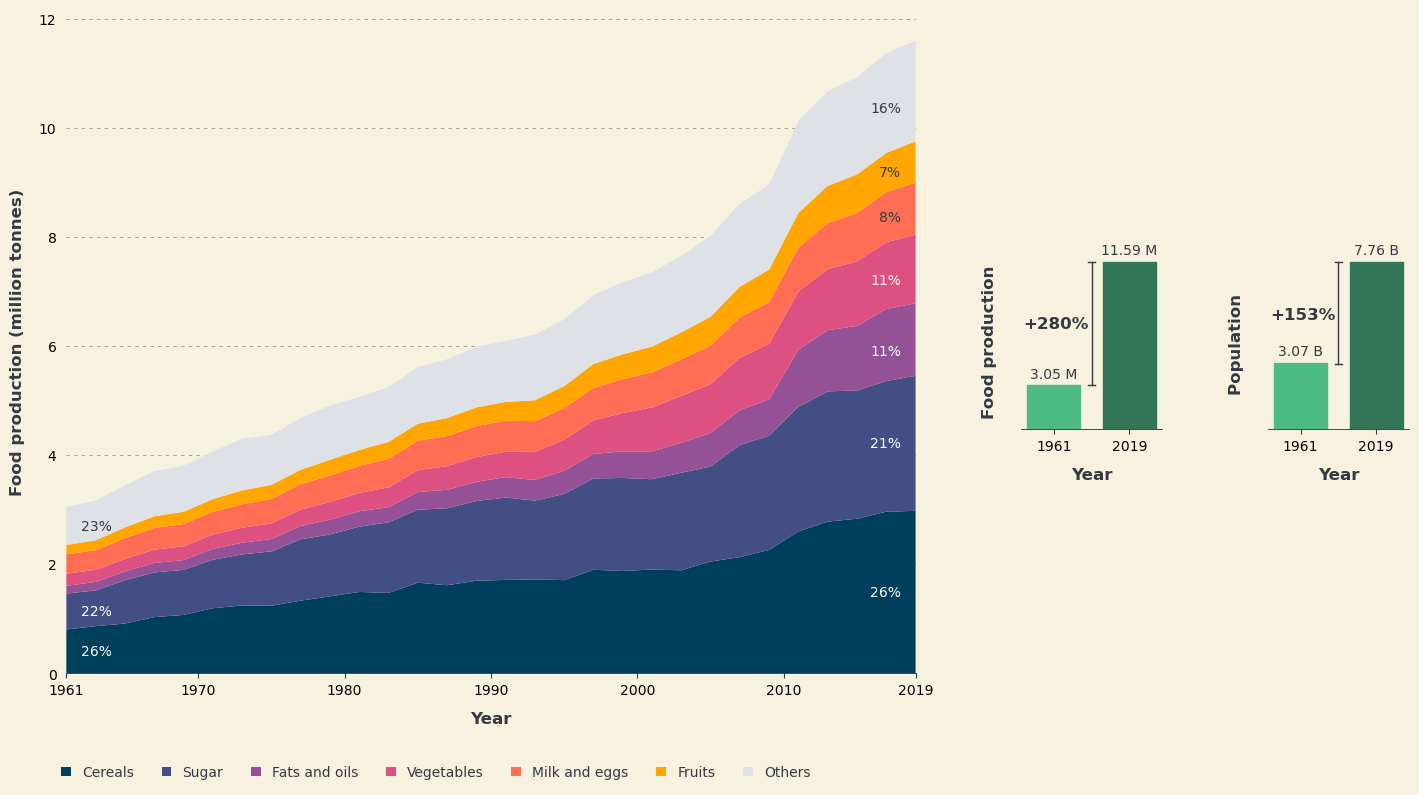

In [36]:
# Setting up figure
fig, ax = plt.subplot_mosaic(
    [
        ['main', 'title', 'title'],
        ['main', 'production', 'population'],
        ['main', 'note', 'note'],
    ],
    figsize = (15, 8),
    layout = "constrained",
    gridspec_kw = {'width_ratios': [3, 0.5, 0.5]}
)
fig.patch.set_facecolor(BACKGROUND_COLOR)

# Increase space between subplots
fig.subplots_adjust(wspace = 0.75)

###############
## MAIN PLOT ##
###############

ax['main'].stackplot(years, cereals, sugar, fats_oils, vegetables, milk_eggs, fruits, others, labels=['Cereals', 'Sugar', 'Fats and oils', 'Vegetables', 'Milk and eggs', 'Fruits', 'Others'], colors = PALETTE_COLOR)

# X AXIS
ax['main'].set_xticks([1961, 1970, 1980, 1990, 2000, 2010, 2019])
ax['main'].set_xlim(1961, 2019)
ax['main'].set_xlabel('Year', fontsize = LABEL_SIZE, fontweight = LABEL_WEIGHT, labelpad = LABEL_PAD, color = PRIMARY_TEXT_COLOR)

# Y AXIS
ax['main'].yaxis.set_ticks_position('none')
ax['main'].set_ylabel('Food production (million tonnes)', fontsize = LABEL_SIZE, fontweight = LABEL_WEIGHT, labelpad = LABEL_PAD, color = PRIMARY_TEXT_COLOR)
ax['main'].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# AXIS
ax['main'].spines['left'].set_visible(False)
ax['main'].spines['top'].set_visible(False)
ax['main'].spines['right'].set_visible(False)
ax['main'].spines['bottom'].set_linewidth(0.5)

# TICK PARAMETERS
ax['main'].tick_params(axis = 'both', which = 'major', labelsize = TICK_SIZE, color = PRIMARY_TEXT_COLOR)

# GRID
ax['main'].set_axisbelow(True)
ax['main'].yaxis.grid(True, color = GRID_COLOR, linestyle = '--', dashes=(5, 6), linewidth = 0.5)

# LEGEND
ax['main'].legend(loc = 'upper center', bbox_to_anchor = (0.435, -0.12), ncol = 7, fontsize = LEGEND_SIZE, frameon = False, handlelength = 0.7)
for text in ax['main'].get_legend().get_texts():
    text.set_color(PRIMARY_TEXT_COLOR)

# ANNOTATION 1961
ax['main'].annotate(str(round(cereals_p[0])) + '%', xy=(1962, 0), xytext = (1962, cereals[0] / 2), fontsize = ANNOTATION_SIZE, color = WHITE_TEXT_COLOR, va = 'center', ha = 'left')
ax['main'].annotate(str(round(sugar_p[0])) + '%', xy=(1962, cereals[0]), xytext = (1962, cereals[0] + sugar[0] / 2), fontsize = ANNOTATION_SIZE, color = WHITE_TEXT_COLOR, va = 'center', ha = 'left')
ax['main'].annotate(str(round(others_p[0])) + '%', xy=(1962, cereals[0] + sugar[0] + fats_oils[0] + vegetables[0] + milk_eggs[0] + fruits[0]), xytext = (1962, cereals[0] + sugar[0] + fats_oils[0] + vegetables[0] + milk_eggs[0] + fruits[0] + others[0] / 2), fontsize = ANNOTATION_SIZE, color = PRIMARY_TEXT_COLOR, va = 'center', ha = 'left')

# ANNOTATION 2019
ax['main'].annotate(str(round(cereals_p[1])) + '%', xy = (2018, 0), xytext = (2018, cereals[-1] / 2), fontsize = ANNOTATION_SIZE, color = WHITE_TEXT_COLOR, va = 'center', ha = 'right')
ax['main'].annotate(str(round(sugar_p[1])) + '%', xy=(2018, cereals[-1]), xytext = (2018, cereals[-1] + sugar[-1] / 2), fontsize = ANNOTATION_SIZE, color = WHITE_TEXT_COLOR, va = 'center', ha = 'right')
ax['main'].annotate(str(round(fats_oils_p[1])) + '%', xy=(2018, cereals[-1] + sugar[-1]), xytext = (2018, cereals[-1] + sugar[-1] + fats_oils[-1] / 3), fontsize = ANNOTATION_SIZE, color = WHITE_TEXT_COLOR, va = 'center', ha = 'right')
ax['main'].annotate(str(round(vegetables_p[1])) + '%', xy=(2018, cereals[-1] + sugar[-1] + fats_oils[-1]), xytext = (2018, cereals[-1] + sugar[-1] + fats_oils[-1] + vegetables[-1] / 3), fontsize = ANNOTATION_SIZE, color = WHITE_TEXT_COLOR, va = 'center', ha = 'right')
ax['main'].annotate(str(round(milk_eggs_p[1])) + '%', xy=(2018, cereals[-1] + sugar[-1] + fats_oils[-1] + vegetables[-1]), xytext = (2018, cereals[-1] + sugar[-1] + fats_oils[-1] + vegetables[-1] + milk_eggs[-1] / 3), fontsize = ANNOTATION_SIZE, color = PRIMARY_TEXT_COLOR, va = 'center', ha = 'right')
ax['main'].annotate(str(round(fruits_p[1])) + '%', xy=(2018, cereals[-1] + sugar[-1] + fats_oils[-1] + vegetables[-1] + milk_eggs[-1]), xytext = (2018, cereals[-1] + sugar[-1] + fats_oils[-1] + vegetables[-1] + milk_eggs[-1] + fruits[-1] / 4), fontsize = ANNOTATION_SIZE, color = PRIMARY_TEXT_COLOR, va = 'center', ha = 'right')
ax['main'].annotate(str(round(others_p[1])) + '%', xy=(2018, cereals[-1] + sugar[-1] + fats_oils[-1] + vegetables[-1] + milk_eggs[-1] + fruits[-1]), xytext = (2018, cereals[-1] + sugar[-1] + fats_oils[-1] + vegetables[-1] + milk_eggs[-1] + fruits[-1] + others[-1] / 3), fontsize = ANNOTATION_SIZE, color = PRIMARY_TEXT_COLOR, va = 'center', ha = 'right')

# BACKGROUND COLOR
ax['main'].set_facecolor(BACKGROUND_COLOR)

#####################
## PRODUCTION PLOT ##
#####################

x = ['1961', '2019']
y = [total_1961, total_2019]

barlist = ax['production'].bar(x, y, width = 0.7, edgecolor = 'none', align = 'center')
barlist[0].set_color(BAR_COLOR[0])
barlist[1].set_color(BAR_COLOR[1])

# X AXIS
ax['production'].set_xticks(['1961', '2019'])
ax['production'].set_xlabel('Year', fontsize = LABEL_SIZE, fontweight = LABEL_WEIGHT, labelpad = LABEL_PAD, color = PRIMARY_TEXT_COLOR)

# Y AXIS
ax['production'].yaxis.set_ticks_position('none')
ax['production'].set_yticklabels([])
ax['production'].set_ylabel('Food production', fontsize = LABEL_SIZE, fontweight = LABEL_WEIGHT, labelpad = LABEL_PAD, color = PRIMARY_TEXT_COLOR)

# AXIS
ax['production'].spines['left'].set_visible(False)
ax['production'].spines['top'].set_visible(False)
ax['production'].spines['right'].set_visible(False)
ax['production'].spines['bottom'].set_linewidth(0.5)

# TICKS PARAMETERS
ax['production'].tick_params(axis = 'both', which = 'major', labelsize = TICK_SIZE, color = PRIMARY_TEXT_COLOR)

# Y VALUE ON BARS
ax['production'].annotate(str(round(y[0] / 1000000, 2)) + ' M', xy = (x[0], y[0]), xytext = (x[0], y[0] + y[0] / 10), fontsize = ANNOTATION_SIZE, color = PRIMARY_TEXT_COLOR, va = 'bottom', ha = 'center')
ax['production'].annotate(str(round(y[1] / 1000000, 2)) + ' M', xy = (x[1], y[1]), xytext = (x[1], y[1] + y[0] / 10), fontsize = ANNOTATION_SIZE, color = PRIMARY_TEXT_COLOR, va = 'bottom', ha = 'center')

# VERTICAL PERCENTAGE LINE
ax['production'].add_artist(plt.Line2D((0.5, 0.5), (3070000, 11550000), color = PRIMARY_TEXT_COLOR, lw = 1))
ax['production'].add_artist(plt.Line2D((0.45, 0.55), (3070000, 3070000), color = PRIMARY_TEXT_COLOR, lw = 1))
ax['production'].add_artist(plt.Line2D((0.45, 0.55), (11550000, 11550000), color = PRIMARY_TEXT_COLOR, lw = 1))
ax['production'].text(0.25, 0.6, '+280%', fontsize = LABEL_SIZE, fontweight = LABEL_WEIGHT, color = PRIMARY_TEXT_COLOR, transform = ax['production'].transAxes, ha = 'center', va = 'center')

# BACKGROUND COLOR
ax['production'].set_facecolor(BACKGROUND_COLOR)

#####################
## POPULATION PLOT ##
#####################

x = ['1961', '2019']
y = [population_1961, population_2019]

# PLOT
barlist = ax['population'].bar(x, y, width = 0.7, edgecolor = 'none', align = 'center')
barlist[0].set_color(BAR_COLOR[0])
barlist[1].set_color(BAR_COLOR[1])

# X AXIS
ax['population'].set_xticks(['1961', '2019'])
ax['population'].set_xlabel('Year', fontsize = LABEL_SIZE, fontweight = LABEL_WEIGHT, labelpad = LABEL_PAD, color = PRIMARY_TEXT_COLOR)

# Y AXIS
ax['population'].yaxis.set_ticks_position('none')
ax['population'].set_yticklabels([])
ax['population'].set_ylabel('Population ', fontsize = LABEL_SIZE, fontweight = LABEL_WEIGHT, labelpad = LABEL_PAD, color = PRIMARY_TEXT_COLOR)

# AXIS
ax['population'].spines['left'].set_visible(False)
ax['population'].spines['top'].set_visible(False)
ax['population'].spines['right'].set_visible(False)
ax['population'].spines['bottom'].set_linewidth(0.5)

# TICKS PARAMETERS
ax['population'].tick_params(axis = 'both', which = 'major', labelsize = TICK_SIZE, color = PRIMARY_TEXT_COLOR)

# Y VALUE ON BARS
ax['population'].annotate(str(round(y[0] / 1000000, 2)) + ' B', xy = (x[0], y[0]), xytext = (x[0], y[0] + y[0] / 15), fontsize = ANNOTATION_SIZE, color = PRIMARY_TEXT_COLOR, va = 'bottom', ha = 'center')
ax['population'].annotate(str(round(y[1] / 1000000, 2)) + ' B', xy = (x[1], y[1]), xytext = (x[1], y[1] + y[0] / 15), fontsize = ANNOTATION_SIZE, color = PRIMARY_TEXT_COLOR, va = 'bottom', ha = 'center')

# VERTICAL PERCENTAGE LINE
ax['population'].add_artist(plt.Line2D((0.5, 0.5), (3040000, 7760000), color = PRIMARY_TEXT_COLOR, lw = 1))
ax['population'].add_artist(plt.Line2D((0.45, 0.55), (3040000, 3040000), color = PRIMARY_TEXT_COLOR, lw = 1))
ax['population'].add_artist(plt.Line2D((0.45, 0.55), (7760000, 7760000), color = PRIMARY_TEXT_COLOR, lw = 1))
ax['population'].text(0.25, 0.65, '+153%', fontsize = LABEL_SIZE, fontweight = LABEL_WEIGHT, color = PRIMARY_TEXT_COLOR, transform = ax['population'].transAxes, ha = 'center', va = 'center')

# BACKGROUND COLOR
ax['population'].set_facecolor(BACKGROUND_COLOR)

##################
## USELESS plot ##
##################

# Remove the unnecessary axes
ax['title'].spines['left'].set_visible(False)
ax['title'].spines['top'].set_visible(False)
ax['title'].spines['right'].set_visible(False)
ax['title'].spines['bottom'].set_visible(False)

# Remove the y axis
ax['title'].set(ylabel=None)
ax['title'].set(yticklabels = [])
ax['title'].set_yticks([])

# Remove the x axis
ax['title'].set(xlabel = None)
ax['title'].set(xticklabels = [])
ax['title'].set_xticks([])

ax['title'].set_facecolor(BACKGROUND_COLOR)

# Remove the unnecessary axes
ax['note'].spines['left'].set_visible(False)
ax['note'].spines['top'].set_visible(False)
ax['note'].spines['right'].set_visible(False)
ax['note'].spines['bottom'].set_visible(False)

# Remove the y axis
ax['note'].set(ylabel=None)
ax['note'].set(yticklabels = [])
ax['note'].set_yticks([])

# Remove the x axis
ax['note'].set(xlabel = None)
ax['note'].set(xticklabels = [])
ax['note'].set_xticks([])

ax['note'].set_facecolor(BACKGROUND_COLOR)

plt.tight_layout()

# Save the plot
plt.savefig('food-production.png', bbox_inches = 'tight', dpi = 1200)
